# ***Task B:***

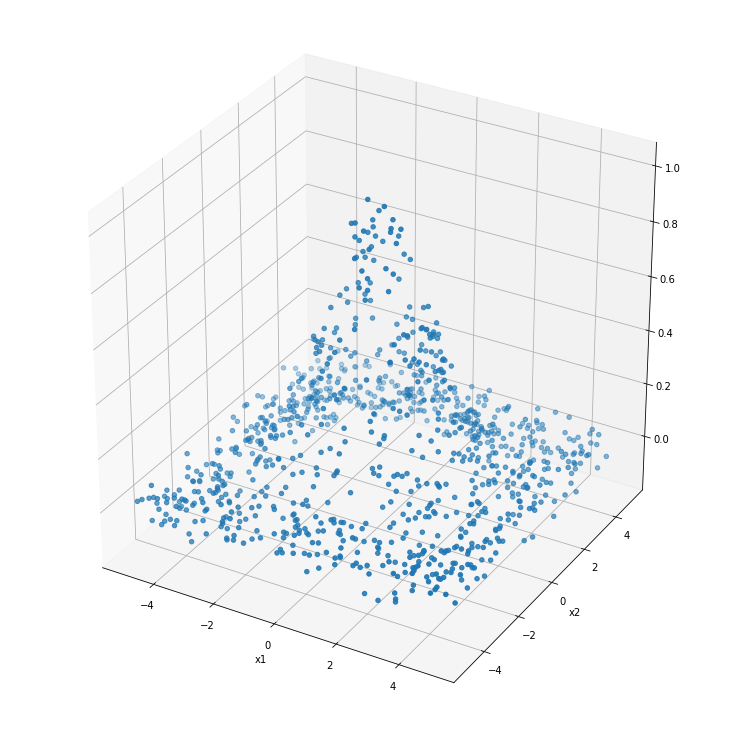

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

N =1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

my_dataset = TensorDataset(x, y ) # do

batch_size = 50 # do
my_dataloader = DataLoader(my_dataset,batch_size=50, shuffle=True) # do...

# 1.  Architecture I: 2-10-1 with ReLU activation for all hidden neuronsv

In [2]:
# fexible model:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1=nn.Linear(in_features=2, out_features=10)
    #self.l2=nn.Linear(in_features=10, out_features=5)
    #self.l3=nn.Linear(in_features=5, out_features=2)
    self.output=nn.Linear(in_features=10, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    #h1=nn.functional.relu(self.l1(X))
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    #h2=self.relu(self.l2(h1))
    #h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h1)
    #logits=self.l3(do)
    return output


Streaming output truncated to the last 5000 lines.
        0.0224, 0.0320, 0.0291, 0.0224, 0.0175, 0.0348, 0.0340, 0.0140, 0.0193,
        0.0254, 0.0182, 0.0175, 0.0277, 0.0108, 0.0100, 0.0357, 0.0354, 0.0149,
        0.0260, 0.0222, 0.0258, 0.0239, 0.0325, 0.0263, 0.0343, 0.0311, 0.0244,
        0.0163, 0.0343, 0.0289, 0.0258, 0.0180, 0.0152, 0.0212, 0.0297, 0.0256,
        0.0307, 0.0219, 0.0242, 0.0184, 0.0151, 0.0201, 0.0277, 0.0141, 0.0251,
        0.0184, 0.0263, 0.0228, 0.0252, 0.0393, 0.0237, 0.0194, 0.0115, 0.0163,
        0.0191, 0.0270, 0.0178, 0.0140, 0.0170, 0.0240, 0.0292, 0.0228, 0.0166,
        0.0247, 0.0249, 0.0258, 0.0200, 0.0226, 0.0090, 0.0314, 0.0305, 0.0122,
        0.0163, 0.0384, 0.0166, 0.0117, 0.0119, 0.0157, 0.0110, 0.0311, 0.0198,
        0.0246, 0.0158, 0.0361, 0.0289, 0.0188, 0.0266, 0.0240, 0.0269, 0.0282,
        0.0245, 0.0199, 0.0155, 0.0108, 0.0109, 0.0195, 0.0304, 0.0077, 0.0282,
        0.0267, 0.0310, 0.0116, 0.0128, 0.0246, 0.0131, 0.0176, 0.033

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0114, 0.0129, 0.0103])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0129, 0.0103, 0.0139])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0103, 0.0139, 0.0082])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0139, 0.0082, 0.0104])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0082, 0.0104, 0.0106])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0104, 0.0106, 0.0128])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0106, 0.0128, 0.0152])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0128, 0.0152, 0.0171])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0152, 0.0171, 0.0118])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0171, 0.0118, 0.0142])
Epoch 250, train cost: tensor([0.3922, 0.2508, 0.1602,  ..., 0.0118, 0.0142, 0.0145])
Epo

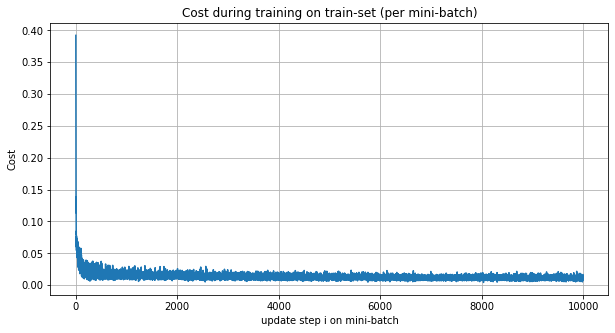

In [5]:
model= Model()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 500      # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)

    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
    #print(f'Epoch {epoch_i}, train cost: {torch.tensor(training_minibatch_Js)}')
  
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")   
 
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


cost after 500 is 0.016446011140942574


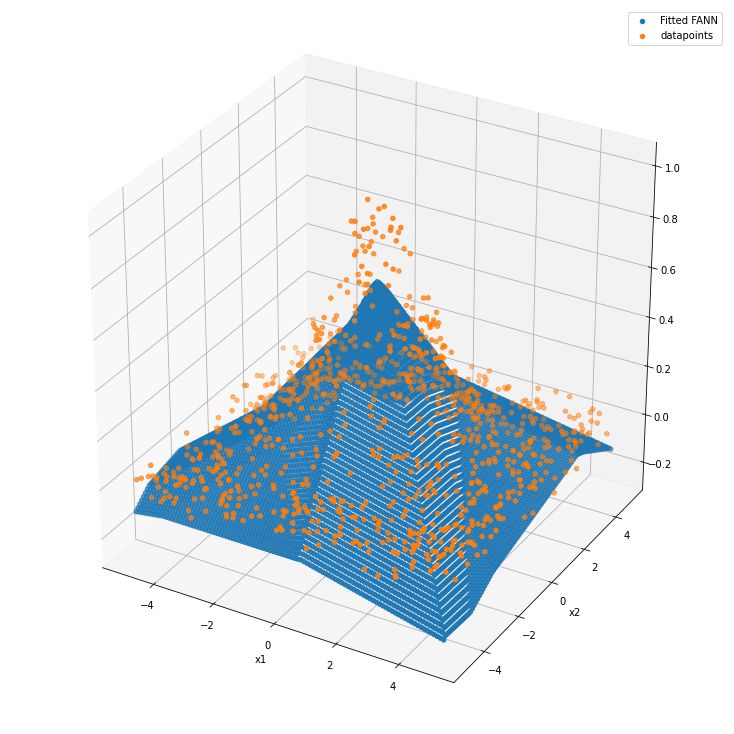

In [6]:
x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

with torch.no_grad():
  y_preds = model(s) # making predictions on surface grid to get surface values.

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

print(f"cost after {nr_epochs} is {training_minibatch_Js[-1]}")

# 2.  Architecture II: 2-50-1 with ReLU activation for all hidden neurons

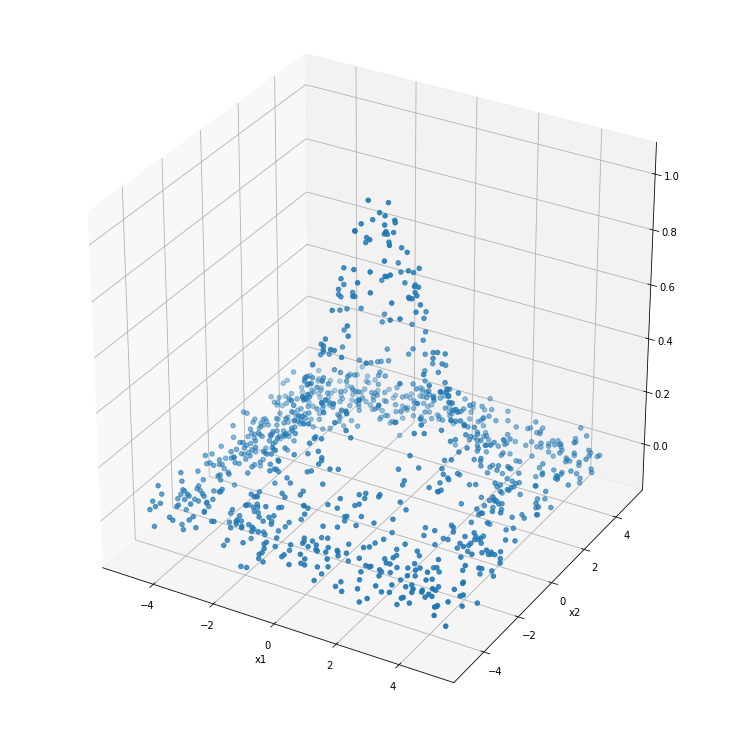

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

N =1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

my_dataset = TensorDataset(x, y ) # do

batch_size = 50 # do
my_dataloader = DataLoader(my_dataset,batch_size=90, shuffle=True) # do...

In [8]:
# fexible model:
class ResNet_2(nn.Module):
  def __init__(self):
    super(ResNet_2, self).__init__()
    self.l1=nn.Linear(in_features=2, out_features=50)
    self.output=nn.Linear(in_features=50, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    #h2=self.relu(self.l2(h1))
    #h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h1)
    #logits=self.l3(do)
    return output

*******************************
final cost is : 0.006126062013208866 


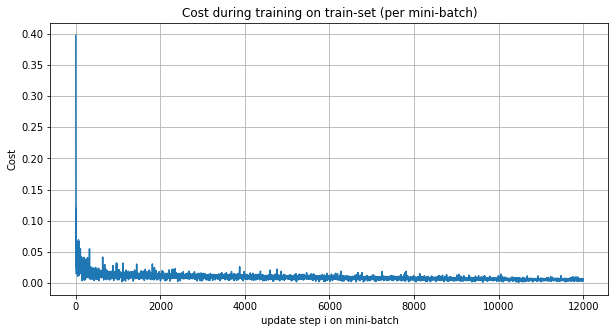

In [10]:
model= ResNet_2()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 1000   # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)

    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
 
    #print(f'Epoch {epoch_i}, train cost: {torch.tensor(training_minibatch_Js)}')
  
  
    
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")


# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

cost after 1000 is 0.006126062013208866


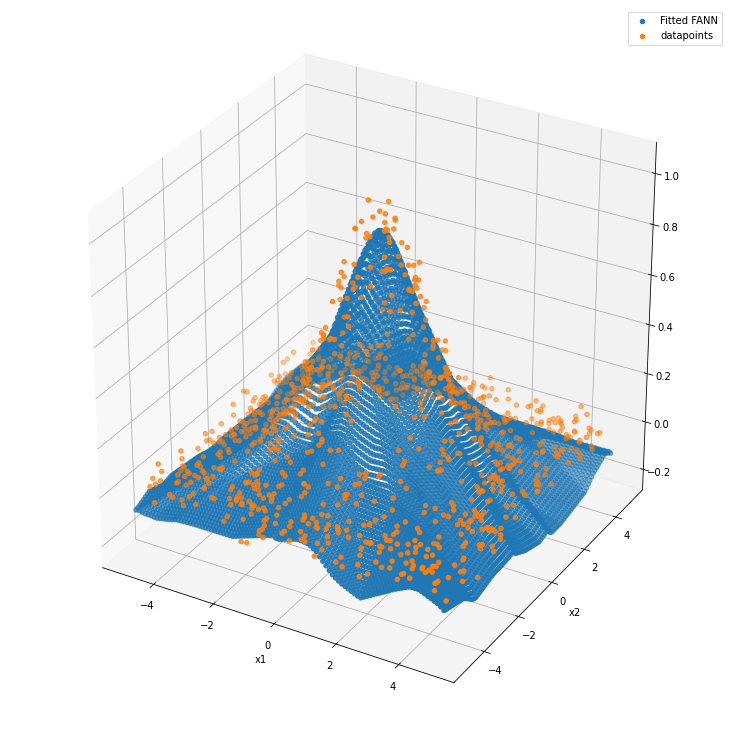

In [11]:
x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

with torch.no_grad():
  y_preds = model(s) # making predictions on surface grid to get surface values.

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

print(f"cost after {nr_epochs} is {training_minibatch_Js[-1]}")

# **3.**

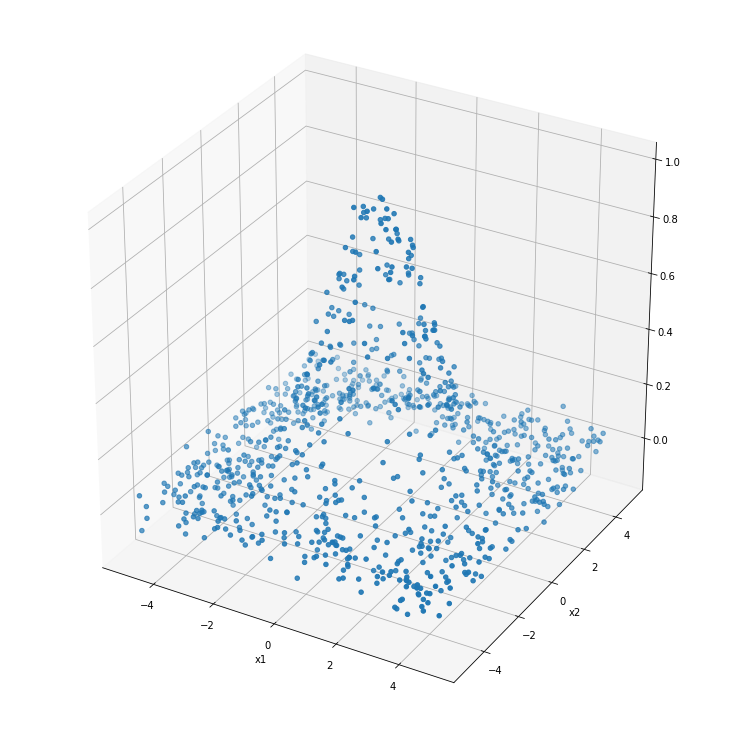

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

N =1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

my_dataset = TensorDataset(x, y ) # do

batch_size = 50 # do
my_dataloader = DataLoader(my_dataset,batch_size=90, shuffle=True) # do...

In [13]:
# fexible model:
class ResNet_3(nn.Module):
  def __init__(self):
    super(ResNet_3, self).__init__()
    self.l1=nn.Linear(in_features=2, out_features=300)
    #self.l2=nn.Linear(in_features=10, out_features=5)
    #self.l3=nn.Linear(in_features=5, out_features=2)
    self.output=nn.Linear(in_features=300, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    #h1=nn.functional.relu(self.l1(X))
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    #h2=self.relu(self.l2(h1))
    #h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h1)
    #logits=self.l3(do)
    return output

*******************************
final cost is : 0.011437357403337955 


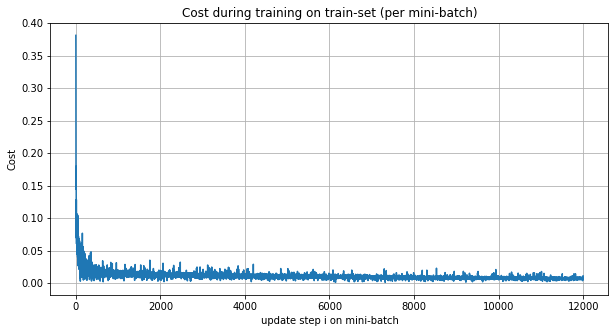

In [14]:
model= ResNet_3()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.001)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 1000      # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)

    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
 
   # print(f'Epoch {epoch_i}, train cost: {torch.tensor(training_minibatch_Js)}')
  
  
   
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")

# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

cost after 1000 is 0.011437357403337955


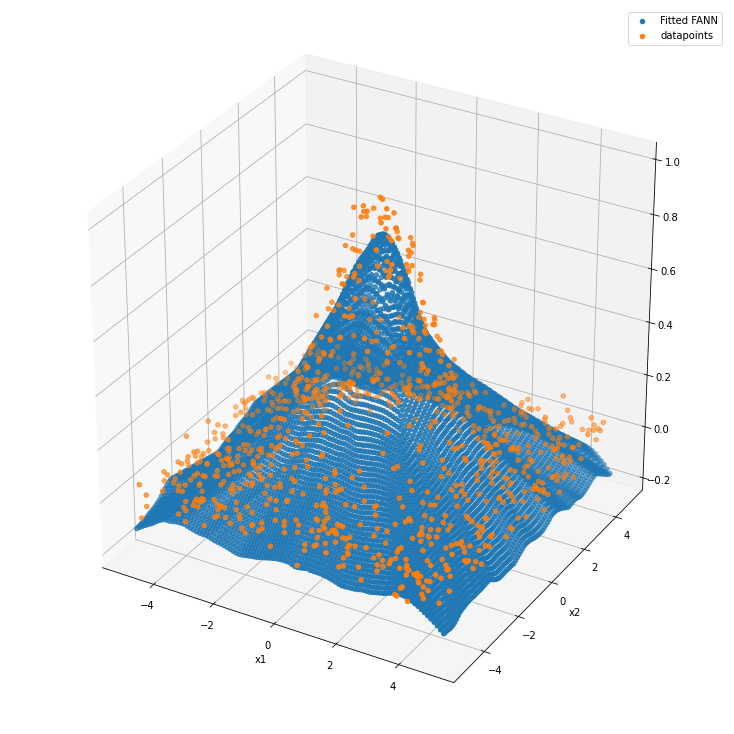

In [15]:
x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

with torch.no_grad():
  y_preds = model(s) # making predictions on surface grid to get surface values.

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

print(f"cost after {nr_epochs} is {training_minibatch_Js[-1]}")

4.  Architecture IV: 2-100-20-5-1 with ReLU activation for all hidden neurons

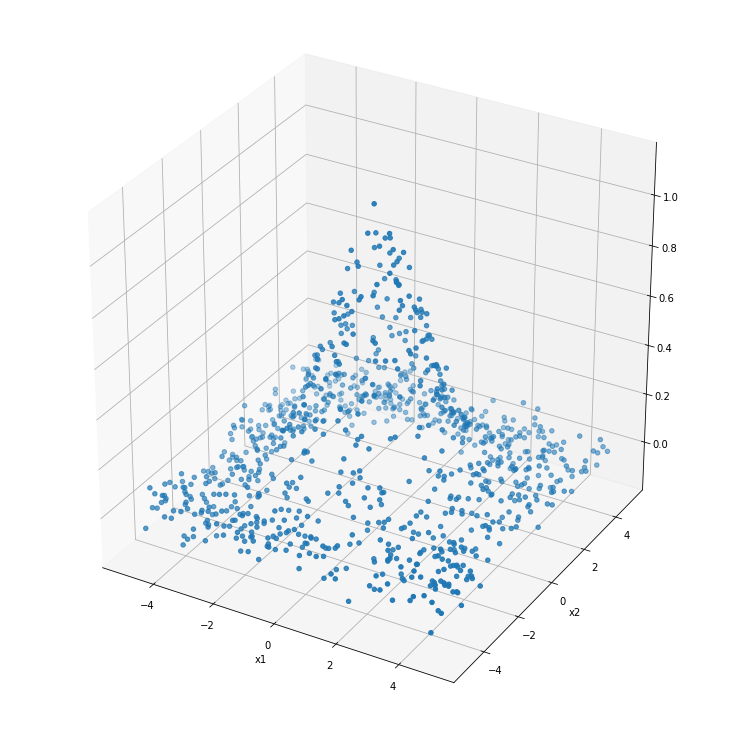

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

N =1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

my_dataset = TensorDataset(x, y ) # do

batch_size = 50 # do
my_dataloader = DataLoader(my_dataset,batch_size=100, shuffle=True) # do...

In [17]:
# fexible model:
class ResNet_4(nn.Module):
  def __init__ (self):
    super(ResNet_4, self).__init__()
    self.l1=nn.Linear(in_features=2, out_features=100)
    self.l2=nn.Linear(in_features=100, out_features=20)
    self.l3=nn.Linear(in_features=20, out_features=5)
    self.output=nn.Linear(in_features=5, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    #h1=nn.functional.relu(self.l1(X))
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    h2=self.relu(self.l2(h1))
    h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h3)
    #logits=self.l3(do)
    return output


*******************************
final cost is : 0.0014234700938686728 


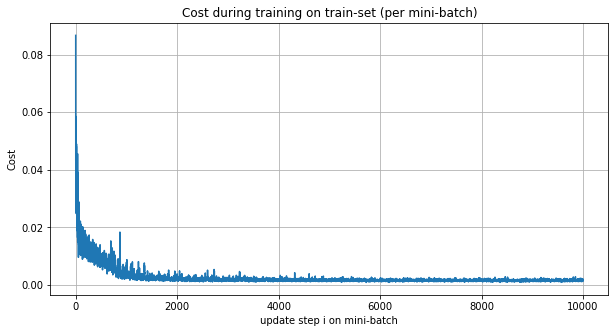

In [18]:
model= ResNet_4()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 1000     # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)

    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
 
  #print(f'Epoch {epoch_i}, train cost: {torch.tensor(training_minibatch_Js)}')
  
  
    
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")
 
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

cost after 1000 is 0.0014234700938686728


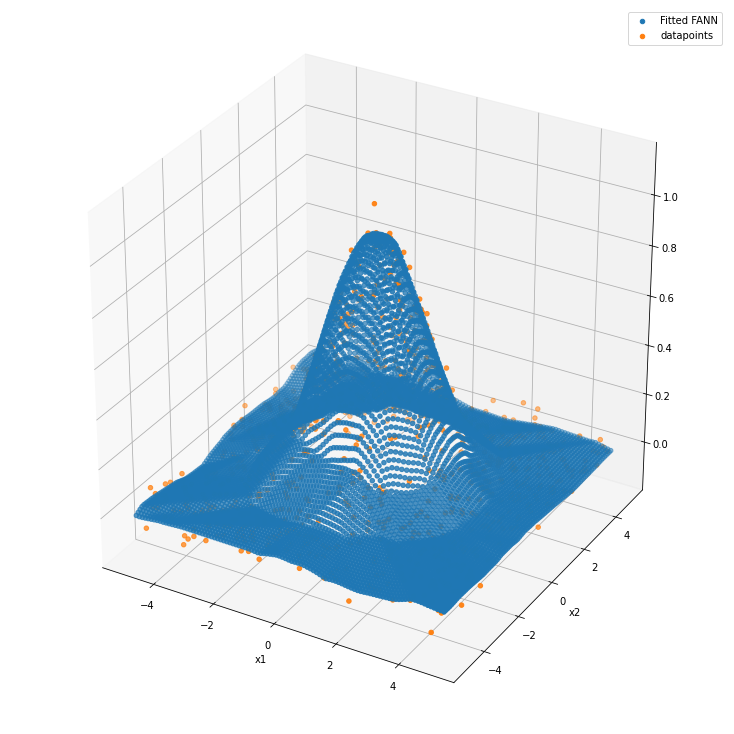

In [19]:
x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

with torch.no_grad():
  y_preds = model(s) # making predictions on surface grid to get surface values.

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

print(f"cost after {nr_epochs} is {training_minibatch_Js[-1]}")

5.  Architecture V: 2-300-100-20-1 with ReLU activation for all hidden neurons

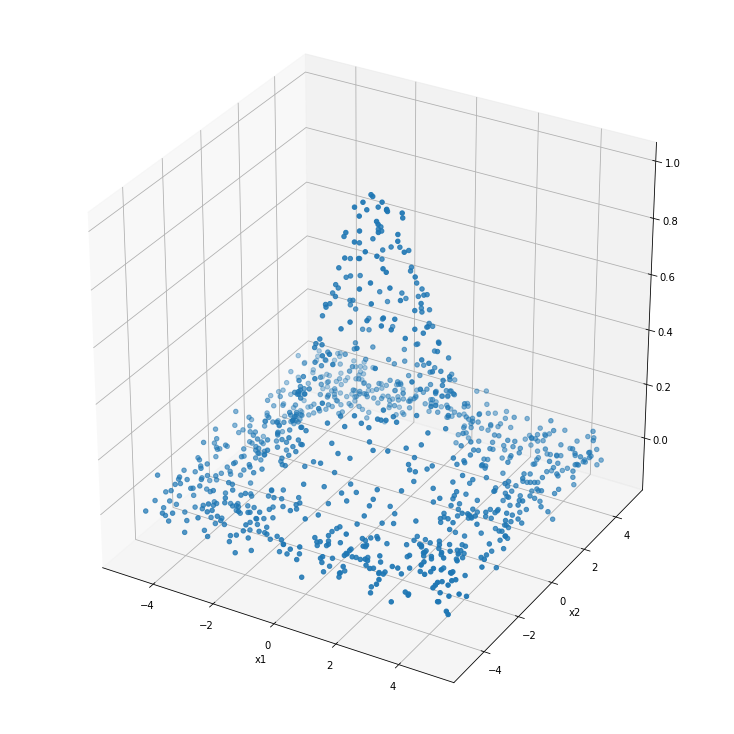

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

N =1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

my_dataset = TensorDataset(x, y ) # do

batch_size = 50 # do
my_dataloader = DataLoader(my_dataset,batch_size=100, shuffle=True) # do...

In [21]:
 # fexible model:
class ResNet_5(nn.Module):
  def __init__(self):
    super(ResNet_5, self).__init__()
    self.l1=nn.Linear(in_features=2, out_features=300)
    self.l2=nn.Linear(in_features=300, out_features=100)
    self.l3=nn.Linear(in_features=100, out_features=20)
    self.output=nn.Linear(in_features=20, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    #h1=nn.functional.relu(self.l1(X))
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    h2=self.relu(self.l2(h1))
    h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h3)
    #logits=self.l3(do)
    return output

*******************************
final cost is : 0.001530676381662488 


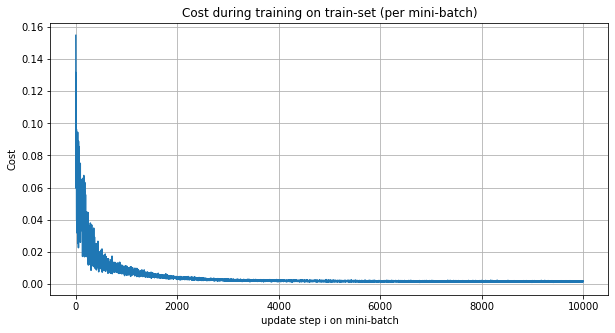

In [22]:
model= ResNet_5()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 1000     # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)

    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
 
  #print(f'Epoch {epoch_i}, train cost: {torch.tensor(training_minibatch_Js)}')
  
  
print("*******************************")  
print ( f"final cost is : {training_minibatch_Js[-1]} ")
    
 
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

cost after 1000 is 0.0015334001509472728


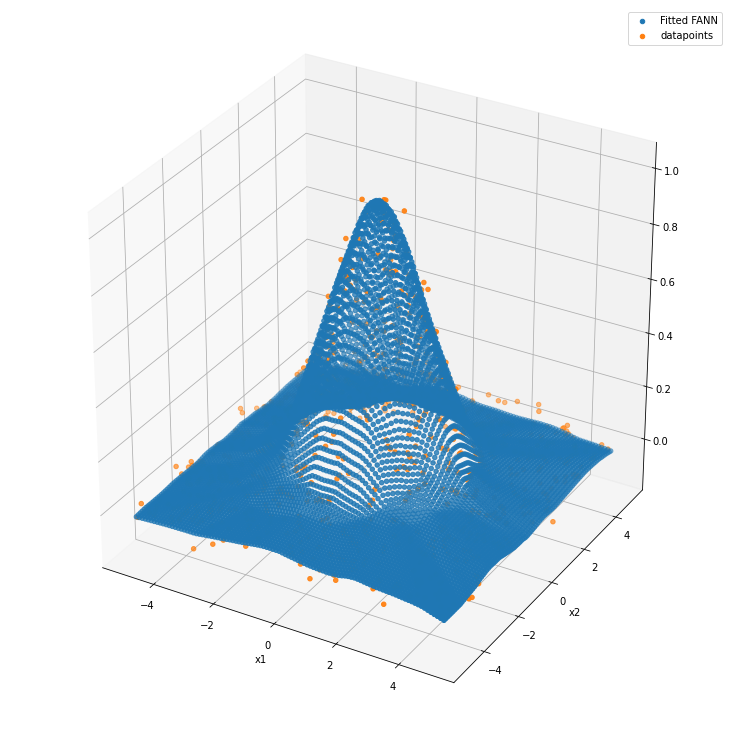

In [ ]:
x1 = torch.linspace(start=-5, end=5, steps=100)
x2 = torch.linspace(start=-5, end=5, steps=100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

with torch.no_grad():
  y_preds = model(s) # making predictions on surface grid to get surface values.

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

print(f"cost after {nr_epochs} is {training_minibatch_Js[-1]}")